In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

C:\Users\AAZam\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Описание столбцов:
age_upon_outcome	-	возраст перед выходом
animal_id	-	идентификатор животного
animal_type	-	тип животного
breed	-	порода
color	-	цвет
date_of_birth	-	дата рождения
datetime	-	дата выхода
monthyear	-	похоже тоже дата выхода
name	-	кличка
outcome_subtype	-	подтип выхода
outcome_type	-	тип выхода
sex_upon_outcome	-	пол

In [2]:
data = pd.read_csv('ДЗ/aac_shelter_outcomes.csv')
data.head(5)

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07T00:00:00,2014-07-07T14:04:00,2014-07-07T14:04:00,NaN,Rabies Risk,Euthanasia,Unknown


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78256 entries, 0 to 78255
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age_upon_outcome  78248 non-null  object
 1   animal_id         78256 non-null  object
 2   animal_type       78256 non-null  object
 3   breed             78256 non-null  object
 4   color             78256 non-null  object
 5   date_of_birth     78256 non-null  object
 6   datetime          78256 non-null  object
 7   monthyear         78256 non-null  object
 8   name              54370 non-null  object
 9   outcome_subtype   35963 non-null  object
 10  outcome_type      78244 non-null  object
 11  sex_upon_outcome  78254 non-null  object
dtypes: object(12)
memory usage: 7.2+ MB


In [4]:
data.describe()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
count,78248,78256,78256,78256,78256,78256,78256,78256,54370,35963,78244,78254
unique,46,70855,5,2128,525,5869,64361,64361,14574,19,9,5
top,1 year,A718223,Dog,Domestic Shorthair Mix,Black/White,2014-05-05T00:00:00,2016-04-18T00:00:00,2016-04-18T00:00:00,Bella,Partner,Adoption,Neutered Male
freq,14355,11,44242,23335,8153,112,39,39,344,19660,33112,27784


**Понимаем что типов исхода из приюта много, поэтому убираем все лишние признаки, ведь задача предсказать только метки 'Adoption' и 'Transfer'**

In [5]:
data = data.query('(outcome_type in ["Adoption", "Transfer"])')

**Поработаем над возрастом, такой формат записи неудобен для анализа**

In [6]:
data['age_upon_outcome'].unique()

array(['2 weeks', '1 year', '9 years', '4 months', '3 years', '1 month',
       '3 months', '2 years', '2 months', '3 weeks', '8 months',
       '5 months', '12 years', '4 years', '7 years', '5 years', '5 days',
       '10 months', '4 weeks', '2 days', '10 years', '6 months',
       '8 years', '11 months', '15 years', '7 months', '6 years',
       '16 years', '9 months', '6 days', '4 days', '1 week', '3 days',
       '14 years', '13 years', '1 day', '1 weeks', '0 years', '11 years',
       '5 weeks', '20 years', '17 years', '19 years', '18 years',
       '25 years', nan], dtype=object)

In [7]:
data['age_upon_outcome'].isna().sum()

2

**Так как строк с отсутствующим значением возраста всего 8. то удалим их**

In [8]:
data['age_upon_outcome'] = data['age_upon_outcome'].fillna(0)
data.head(5)

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male
5,4 months,A664462,Dog,Leonberger Mix,Brown/White,2013-06-03T00:00:00,2013-10-07T13:06:00,2013-10-07T13:06:00,*Edgar,Partner,Transfer,Intact Male


In [9]:
data = data[data['age_upon_outcome'] != 0]
data.head(5)

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male
5,4 months,A664462,Dog,Leonberger Mix,Brown/White,2013-06-03T00:00:00,2013-10-07T13:06:00,2013-10-07T13:06:00,*Edgar,Partner,Transfer,Intact Male


**Преведем возраст к единообразию, выразим его в днях**

In [10]:
data['age_upon_outcome'].str.split(' ')

0         [2, weeks]
1          [1, year]
2          [1, year]
3         [9, years]
5        [4, months]
            ...     
78250     [1, month]
78251     [1, month]
78252     [3, years]
78254    [2, months]
78255    [2, months]
Name: age_upon_outcome, Length: 56609, dtype: object

In [11]:
data['num_per']  = data['age_upon_outcome'].str.split(' ').str[0].astype(int)
data['per'] = data['age_upon_outcome'].str.split(' ').str[1]
data.head(5)

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome,num_per,per
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male,2,weeks
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female,1,year
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male,1,year
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male,9,years
5,4 months,A664462,Dog,Leonberger Mix,Brown/White,2013-06-03T00:00:00,2013-10-07T13:06:00,2013-10-07T13:06:00,*Edgar,Partner,Transfer,Intact Male,4,months


In [12]:
data['per'] = np.where(data['per'].str.contains('day'), 1, 
                np.where(data['per'].str.contains('week'), 7, 
                np.where(data['per'].str.contains('month'), 30, 
                np.where(data['per'].str.contains('year'), 365, 0)))).astype(int)

data['age_in_days'] = data['num_per'] * data['per'] 
data.head(5)

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome,num_per,per,age_in_days
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male,2,7,14
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female,1,365,365
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male,1,365,365
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male,9,365,3285
5,4 months,A664462,Dog,Leonberger Mix,Brown/White,2013-06-03T00:00:00,2013-10-07T13:06:00,2013-10-07T13:06:00,*Edgar,Partner,Transfer,Intact Male,4,30,120


**Проведем деление по возрастам (введем три категории возраста: Молодой, до полугода-1, Средний, до 5 лет-2, Зрелый, старше 5 лет-3), т.к. есть гипотеза что в молодом возрасте шансы найти новых хозяев выше**

In [13]:
data['age_kat_num'] = np.where(data['age_in_days'] < 188, 1, 
                np.where(data['age_in_days'] < 1825, 2, 3)).astype(int)
data['age_kat'] = np.where(data['age_in_days'] < 188, 'Молодой', 
                np.where(data['age_in_days'] < 1825, 'Средний', 'Зрелый'))
data.head(5)

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome,num_per,per,age_in_days,age_kat_num,age_kat
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male,2,7,14,1,Молодой
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female,1,365,365,2,Средний
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male,1,365,365,2,Средний
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male,9,365,3285,3,Зрелый
5,4 months,A664462,Dog,Leonberger Mix,Brown/White,2013-06-03T00:00:00,2013-10-07T13:06:00,2013-10-07T13:06:00,*Edgar,Partner,Transfer,Intact Male,4,30,120,1,Молодой


In [14]:
data['outcome_type'] = data['outcome_type'].fillna(0)
data = data[data['outcome_type'] != 0]
data.head(5)

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome,num_per,per,age_in_days,age_kat_num,age_kat
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male,2,7,14,1,Молодой
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female,1,365,365,2,Средний
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male,1,365,365,2,Средний
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male,9,365,3285,3,Зрелый
5,4 months,A664462,Dog,Leonberger Mix,Brown/White,2013-06-03T00:00:00,2013-10-07T13:06:00,2013-10-07T13:06:00,*Edgar,Partner,Transfer,Intact Male,4,30,120,1,Молодой


In [15]:
# Prepare data
x_var = 'age_kat_num'
groupby_var = 'outcome_type'
df_agg = data.loc[:, [x_var, groupby_var]].groupby(groupby_var)
df_agg.head()
vals = [df[x_var].values.tolist() for i, df in df_agg]


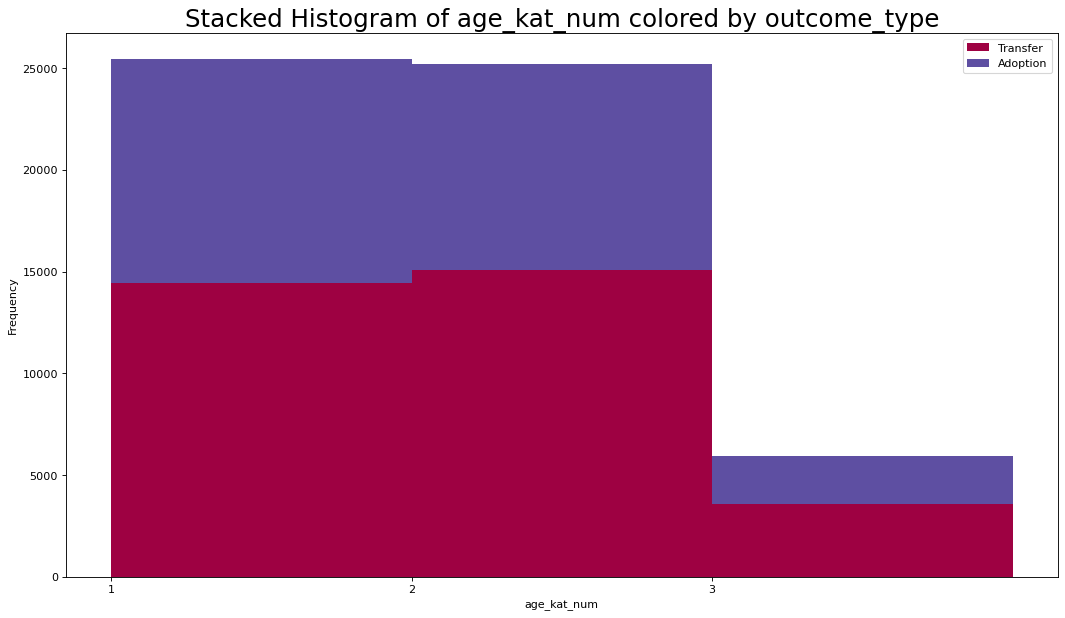

In [16]:
# Draw
plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, data[x_var].unique().__len__(), stacked=True, density=False, color=colors[:len(vals)])

# Decoration
plt.legend({group:col for group, col in zip(data[groupby_var].unique().tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of {x_var} colored by {groupby_var}", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
# plt.ylim(0, 40)
plt.xticks(ticks=bins[:(len(np.unique(data[x_var]).tolist()))], labels=np.unique(data[x_var]).tolist())
plt.show()

**Гипотеза не подтвердилась, при этом наблюдаю путаницу в легенде. Буду рад если поможете разобраться почему цвета неравильно подписаны**

**Шатаем данные с помощью сводных таблиц**

In [17]:
data.pivot_table(index='age_kat', columns='outcome_type', values='animal_id',  dropna=False, aggfunc='count')

outcome_type,Adoption,Transfer
age_kat,,
Зрелый,3558,2405
Молодой,14464,10980
Средний,15090,10112


**Явного приоритета нет ни у одной категории возраста. Попробуем разбить возраст на большее количество интервалов**

In [18]:
data['age_group'] = pd.cut(data['age_in_days'] / 365, 25)
data['age_group'].value_counts()

(-0.025, 1.0]    38847
(1.0, 2.0]        7147
(2.0, 3.0]        3014
(3.0, 4.0]        1638
(4.0, 5.0]        1515
(5.0, 6.0]         989
(7.0, 8.0]         852
(6.0, 7.0]         798
(9.0, 10.0]        595
(8.0, 9.0]         392
(11.0, 12.0]       282
(10.0, 11.0]       194
(12.0, 13.0]       142
(13.0, 14.0]        83
(14.0, 15.0]        77
(15.0, 16.0]        21
(16.0, 17.0]        14
(17.0, 18.0]         3
(19.0, 20.0]         3
(18.0, 19.0]         2
(24.0, 25.0]         1
(23.0, 24.0]         0
(20.0, 21.0]         0
(21.0, 22.0]         0
(22.0, 23.0]         0
Name: age_group, dtype: int64

**Видим что значительное число животных покидает приют в первый год жизни, дальше это число значительно падает. Отсечем возраст старше 10 лет**

In [23]:
data = data.loc[data['age_in_days'] <= 3650]
data

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome,num_per,per,age_in_days,age_kat_num,age_kat,age_group
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male,2,7,14,1,Молодой,"(-0.025, 1.0]"
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female,1,365,365,2,Средний,"(-0.025, 1.0]"
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male,1,365,365,2,Средний,"(-0.025, 1.0]"
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male,9,365,3285,3,Зрелый,"(8.0, 9.0]"
5,4 months,A664462,Dog,Leonberger Mix,Brown/White,2013-06-03T00:00:00,2013-10-07T13:06:00,2013-10-07T13:06:00,*Edgar,Partner,Transfer,Intact Male,4,30,120,1,Молодой,"(-0.025, 1.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78250,1 month,A764895,Dog,Golden Retriever/Labrador Retriever,Brown/White,2017-12-04T00:00:00,2018-02-01T18:40:00,2018-02-01T18:40:00,NaN,Foster,Adoption,Neutered Male,1,30,30,1,Молодой,"(-0.025, 1.0]"
78251,1 month,A764894,Dog,Golden Retriever/Labrador Retriever,Brown/White,2017-12-04T00:00:00,2018-02-01T18:26:00,2018-02-01T18:26:00,NaN,Foster,Adoption,Spayed Female,1,30,30,1,Молодой,"(-0.025, 1.0]"
78252,3 years,A764468,Dog,Mastiff Mix,Blue/White,2014-12-30T00:00:00,2018-02-01T18:06:00,2018-02-01T18:06:00,Max,NaN,Adoption,Neutered Male,3,365,1095,2,Средний,"(2.0, 3.0]"
78254,2 months,A765858,Dog,Standard Schnauzer,Red,2017-11-13T00:00:00,2018-02-01T18:32:00,2018-02-01T18:32:00,NaN,NaN,Adoption,Spayed Female,2,30,60,1,Молодой,"(-0.025, 1.0]"


In [27]:
data.query('(age_in_days > 3650)')

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome,num_per,per,age_in_days,age_kat_num,age_kat,age_group


**Преведем группы по возрасту в числовой вид**

In [53]:
# data.loc[:,'age_group']
data['age_group_num'] = data['age_group'].astype('str')
data['age_group_num'] = data['age_group_num'].str.extract(r', ([0-9]+)+').astype('int')
data.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome,num_per,per,age_in_days,age_kat_num,age_kat,age_group,age_group_num
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male,2,7,14,1,Молодой,"(-0.025, 1.0]",1
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female,1,365,365,2,Средний,"(-0.025, 1.0]",1
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male,1,365,365,2,Средний,"(-0.025, 1.0]",1
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male,9,365,3285,3,Зрелый,"(8.0, 9.0]",9
5,4 months,A664462,Dog,Leonberger Mix,Brown/White,2013-06-03T00:00:00,2013-10-07T13:06:00,2013-10-07T13:06:00,*Edgar,Partner,Transfer,Intact Male,4,30,120,1,Молодой,"(-0.025, 1.0]",1


In [55]:
data.pivot_table(index='age_group_num', columns='outcome_type', values='animal_id',  dropna=False, aggfunc='count')

outcome_type,Adoption,Transfer
age_group_num,,
1,22631,16216
2,4102,3045
3,1816,1198
4,1005,633
5,911,604
6,593,396
7,479,319
8,548,304
9,263,129


**По всем группам возрастов наблюдаем что переводов меньше чем заборов из приюта**

**Проверим уникальность айдишников**

In [66]:
data.animal_id.__len__() - data.animal_id.unique().__len__() 

3754

**3754 записи неуникальны, значит животные могут попадать в приют по нескольку раз**

**Посмотрим какие животные у нас в приюте**

In [20]:
data.pivot_table(index='animal_type', columns='outcome_type', values='animal_id',  dropna=False, aggfunc='count')

outcome_type,Adoption,Transfer
animal_type,,
Bird,114,91
Cat,12732,13323
Dog,20052,9517
Livestock,2,6
Other,212,560


**Собак забирают чаще чем котиков. Остальные типы животных встречаются значительно реже, уберём их**

In [67]:
data = data.query('(animal_type in ["Cat", "Dog"])')
data.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome,num_per,per,age_in_days,age_kat_num,age_kat,age_group,age_group_num
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male,2,7,14,1,Молодой,"(-0.025, 1.0]",1
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female,1,365,365,2,Средний,"(-0.025, 1.0]",1
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male,1,365,365,2,Средний,"(-0.025, 1.0]",1
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male,9,365,3285,3,Зрелый,"(8.0, 9.0]",9
5,4 months,A664462,Dog,Leonberger Mix,Brown/White,2013-06-03T00:00:00,2013-10-07T13:06:00,2013-10-07T13:06:00,*Edgar,Partner,Transfer,Intact Male,4,30,120,1,Молодой,"(-0.025, 1.0]",1


In [68]:
data.pivot_table(index='animal_type', columns='outcome_type', values='animal_id',  dropna=False, aggfunc='count')

outcome_type,Adoption,Transfer
animal_type,,
Cat,12523,13168
Dog,19817,9298


**Посмотрим породу, есть гипотеза что чистокровных берут лучше. Выделим признак - Mix.**

In [72]:
data['breed'].str.extract(r' (Mix)')

,0
0,Mix
1,Mix
2,NaN
3,Mix
5,Mix
...,...
78250,NaN
78251,NaN
78252,Mix
78254,NaN


In [73]:
data['breed_mix'] = np.where(data['breed'].str.extract(r' (Mix)') == 'Mix', 1, 0)
data.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome,num_per,per,age_in_days,age_kat_num,age_kat,age_group,age_group_num,breed_mix
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male,2,7,14,1,Молодой,"(-0.025, 1.0]",1,1
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female,1,365,365,2,Средний,"(-0.025, 1.0]",1,1
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male,1,365,365,2,Средний,"(-0.025, 1.0]",1,0
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male,9,365,3285,3,Зрелый,"(8.0, 9.0]",9,1
5,4 months,A664462,Dog,Leonberger Mix,Brown/White,2013-06-03T00:00:00,2013-10-07T13:06:00,2013-10-07T13:06:00,*Edgar,Partner,Transfer,Intact Male,4,30,120,1,Молодой,"(-0.025, 1.0]",1,1


**Получили дополнительный признак breed_mix, который показывает является ли животное чистокровным**

**Цвет и дата рождения пропускам так так возраст животного уже учтен, а как использовать всё многообразие цветов не приходит в голову**

**Из времени исхода из приюта попробуем выделить признаки времени суток и рабочих\выходных дней. Предполагаю что часы и дни недели для перемещения и передаче новым хозяевам могут отличаться**

In [87]:
data['exit_day'] = pd.to_datetime(data['datetime']).dt.weekday
data['exit_hour'] = pd.to_datetime(data['datetime']).dt.hour
data.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,...,num_per,per,age_in_days,age_kat_num,age_kat,age_group,age_group_num,breed_mix,exit_day,exit_hour
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,NaN,Partner,...,2,7,14,1,Молодой,"(-0.025, 1.0]",1,1,1,16
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,...,1,365,365,2,Средний,"(-0.025, 1.0]",1,1,3,11
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,NaN,...,1,365,365,2,Средний,"(-0.025, 1.0]",1,0,1,14
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,...,9,365,3285,3,Зрелый,"(8.0, 9.0]",9,1,6,15
5,4 months,A664462,Dog,Leonberger Mix,Brown/White,2013-06-03T00:00:00,2013-10-07T13:06:00,2013-10-07T13:06:00,*Edgar,Partner,...,4,30,120,1,Молодой,"(-0.025, 1.0]",1,1,0,13


,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,...,num_per,per,age_in_days,age_kat_num,age_kat,age_group,age_group_num,breed_mix,exit_day,exit_hour
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,NaN,Partner,...,2,7,14,1,Молодой,"(-0.025, 1.0]",1,1,1,16
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,...,1,365,365,2,Средний,"(-0.025, 1.0]",1,1,3,11
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,NaN,...,1,365,365,2,Средний,"(-0.025, 1.0]",1,0,1,14
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,...,9,365,3285,3,Зрелый,"(8.0, 9.0]",9,1,6,15
5,4 months,A664462,Dog,Leonberger Mix,Brown/White,2013-06-03T00:00:00,2013-10-07T13:06:00,2013-10-07T13:06:00,*Edgar,Partner,...,4,30,120,1,Молодой,"(-0.025, 1.0]",1,1,0,13


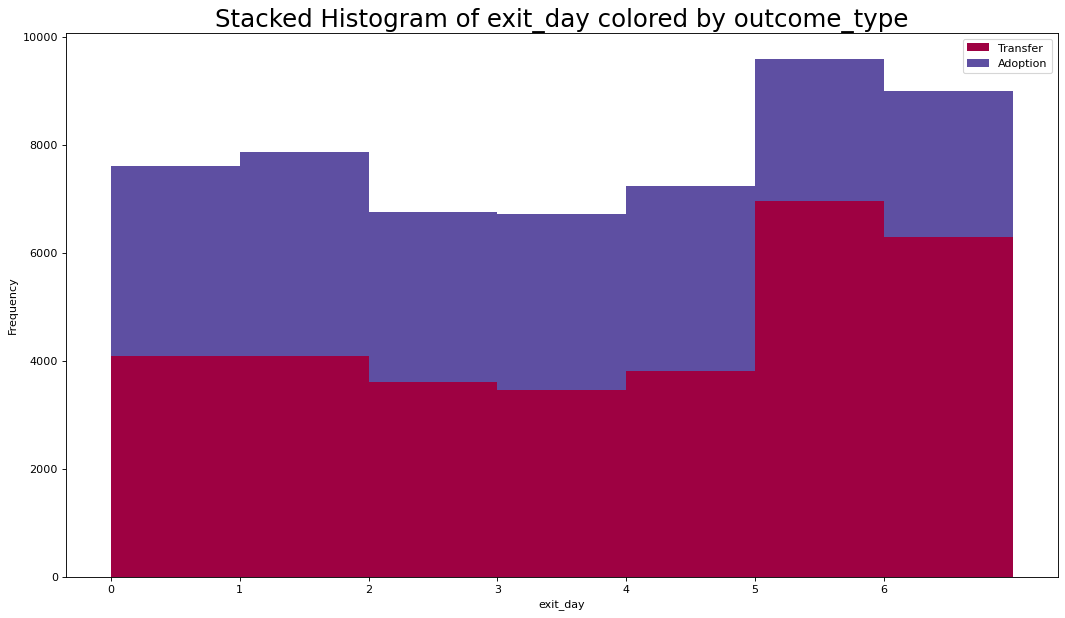

In [91]:
x_var = 'exit_day'
groupby_var = 'outcome_type'
df_agg = data.loc[:, [x_var, groupby_var]].groupby(groupby_var)

vals = [df[x_var].values.tolist() for i, df in df_agg]

# Draw
plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, data[x_var].unique().__len__(), stacked=True, density=False, color=colors[:len(vals)])

# Decoration
plt.legend({group:col for group, col in zip(data[groupby_var].unique().tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of {x_var} colored by {groupby_var}", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
# plt.ylim(0, 40)
plt.xticks(ticks=bins[:(len(np.unique(data[x_var]).tolist()))], labels=np.unique(data[x_var]).tolist())
plt.show()

In [92]:
data.pivot_table(index='exit_day', columns='outcome_type', values='animal_id',  dropna=False, aggfunc='count')

outcome_type,Adoption,Transfer
exit_day,,
0,4093,3522
1,4101,3770
2,3609,3155
3,3463,3256
4,3808,3441
5,6970,2621
6,6296,2701


**Гипотеза про дни недели подтверждается, в субботу и воскресенье количество заборов превышает количество перемещений более чем в два раза, в будние дни они примерно одинаковы.**

**В гистрограмме опять перепутаны цвета местами, поможете разобраться где поправить?**

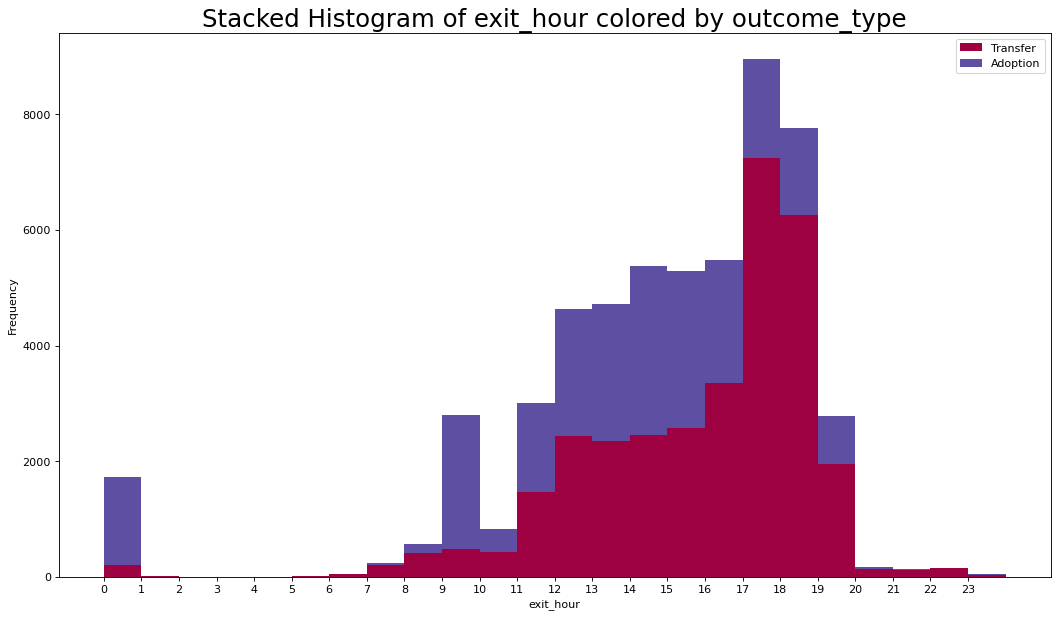

In [93]:
x_var = 'exit_hour'
groupby_var = 'outcome_type'
df_agg = data.loc[:, [x_var, groupby_var]].groupby(groupby_var)

vals = [df[x_var].values.tolist() for i, df in df_agg]

# Draw
plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, data[x_var].unique().__len__(), stacked=True, density=False, color=colors[:len(vals)])

# Decoration
plt.legend({group:col for group, col in zip(data[groupby_var].unique().tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of {x_var} colored by {groupby_var}", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
# plt.ylim(0, 40)
plt.xticks(ticks=bins[:(len(np.unique(data[x_var]).tolist()))], labels=np.unique(data[x_var]).tolist())
plt.show()

In [94]:
data.pivot_table(index='exit_hour', columns='outcome_type', values='animal_id',  dropna=False, aggfunc='count')

outcome_type,Adoption,Transfer
exit_hour,,
0,207.0,1521.0
1,10.0,2.0
2,4.0,NaN
3,1.0,NaN
4,6.0,NaN
5,12.0,1.0
6,45.0,5.0
7,204.0,41.0
8,406.0,154.0


**Помним что цвета перепутаны, и гипотеза про влияние часа выхода из приюта подтверждается**

**Кличку пропустим, она не влияет на тип выхода(надеюсь :). Попытаемся разобраться с подтипом выхода**

In [95]:
data['outcome_subtype'].unique()

array(['Partner', nan, 'Offsite', 'Foster', 'SCRP', 'Barn', 'Snr'],
      dtype=object)

In [96]:
data['outcome_subtype'].isna().sum()

26594

In [99]:
data['outcome_subtype'].__len__()

54806

**Почти половина подтипа выхода - отсутствующие значения. Не совсем понял как можно использовать этот признак. Поэтому пропускаем**

**Пол и признак стерильности это важная информация, но обрабатывать её когда она в одном поле неудобно. Разнесём их по разным столбцам**

In [100]:
data['sex_upon_outcome'].unique()

array(['Intact Male', 'Spayed Female', 'Neutered Male', 'Intact Female',
       'Unknown'], dtype=object)

In [104]:
data[data['sex_upon_outcome'] == 'Unknown'].outcome_type.unique()

array(['Transfer', 'Adoption'], dtype=object)

In [105]:
data.pivot_table(index='sex_upon_outcome', columns='outcome_type', values='animal_id',  dropna=False, aggfunc='count')

outcome_type,Adoption,Transfer
sex_upon_outcome,,
Intact Female,711,5919
Intact Male,557,5433
Neutered Male,15645,4664
Spayed Female,15426,4083
Unknown,1,2367


In [108]:
data['sex'] = data['sex_upon_outcome'].str.extract(r' (Male|Female|Unknown)')
data['kastr'] = data['sex_upon_outcome'].str.extract(r'(Intact|Neutered|Spayed|Unknown)')
data.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,...,age_in_days,age_kat_num,age_kat,age_group,age_group_num,breed_mix,exit_day,exit_hour,sex,kastr
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,NaN,Partner,...,14,1,Молодой,"(-0.025, 1.0]",1,1,1,16,Male,Intact
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,...,365,2,Средний,"(-0.025, 1.0]",1,1,3,11,Female,Spayed
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,NaN,...,365,2,Средний,"(-0.025, 1.0]",1,0,1,14,Male,Neutered
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,...,3285,3,Зрелый,"(8.0, 9.0]",9,1,6,15,Male,Neutered
5,4 months,A664462,Dog,Leonberger Mix,Brown/White,2013-06-03T00:00:00,2013-10-07T13:06:00,2013-10-07T13:06:00,*Edgar,Partner,...,120,1,Молодой,"(-0.025, 1.0]",1,1,0,13,Male,Intact


In [109]:
data.pivot_table(index='sex', columns='outcome_type', values='animal_id',  dropna=False, aggfunc='count')

outcome_type,Adoption,Transfer
sex,,
Female,16137,10002
Male,16202,10097


In [110]:
data.pivot_table(index='kastr', columns='outcome_type', values='animal_id',  dropna=False, aggfunc='count')

outcome_type,Adoption,Transfer
kastr,,
Intact,1268,11352
Neutered,15645,4664
Spayed,15426,4083
Unknown,1,2367


**Видно что стерильность животного значимо влияет на статус выхода животного, в то время как пол практически не влияет**

**Создадим датасет только со значимыми признаками (как я их вижу)**

In [112]:
data.columns

Index(['age_upon_outcome', 'animal_id', 'animal_type', 'breed', 'color',
       'date_of_birth', 'datetime', 'monthyear', 'name', 'outcome_subtype',
       'outcome_type', 'sex_upon_outcome', 'num_per', 'per', 'age_in_days',
       'age_kat_num', 'age_kat', 'age_group', 'age_group_num', 'breed_mix',
       'exit_day', 'exit_hour', 'sex', 'kastr'],
      dtype='object')

In [116]:
x = data.filter(items = ['age_group_num', 'breed_mix', 'exit_day', 'exit_hour', 'kastr'])
x.head()

,age_group_num,breed_mix,exit_day,exit_hour,kastr
0,1,1,1,16,Intact
1,1,1,3,11,Spayed
2,1,0,1,14,Neutered
3,9,1,6,15,Neutered
5,1,1,0,13,Intact


In [117]:
import pandas_profiling

x.profile_report()

**Поизучали отчет, предупреждение о нулях игнорируем т.к. все равно надо привести это к категориям.**

In [122]:
for col in x:
    x[col] = x[col].astype('category')
    
y = data['outcome_type'].astype('category')

In [ ]:
**Приводим данные к машиночитаемому виду, переводя множественные признаки в индикаторные переменные**

In [120]:
xd = pd.get_dummies(x)
xd.head()

,age_group_num_1,age_group_num_2,age_group_num_3,age_group_num_4,age_group_num_5,age_group_num_6,age_group_num_7,age_group_num_8,age_group_num_9,age_group_num_10,...,exit_hour_18,exit_hour_19,exit_hour_20,exit_hour_21,exit_hour_22,exit_hour_23,kastr_Intact,kastr_Neutered,kastr_Spayed,kastr_Unknown
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


**Мы получаем имена столбцов, которые будут использоваться в анализе, и переводим преобразованные данные в массив numpy.**

In [121]:
xnames = xd.columns
xarr = np.array(xd)

**Переводим в одномерный массив для обучения и тестирования прогнозируемых значений. Используем для этого функцию факторизации которая возвращает два массива, метки данного массива и факторизованные значения.**

In [123]:
yarr, ynames = pd.factorize(y)

**Разделим данные на тренировочные и проверочные**

In [125]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(xarr, yarr, test_size=0.2, random_state=1)

**Проведем центрировку и масштабирование наших данных с помощью модуля предпроцессинга**

In [126]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

**Проведем предварительную оценку значимости параметров для модели с помощью классификатора**

In [129]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, criterion='gini', 
                                       class_weight='balanced_subsample', bootstrap=True, oob_score=True)

rf_classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced_subsample',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=True,
                       random_state=None, verbose=0, warm_start=False)

**Посмотрим на 10 самых значимых параметров**

<AxesSubplot:xlabel='feature', ylabel='importance'>

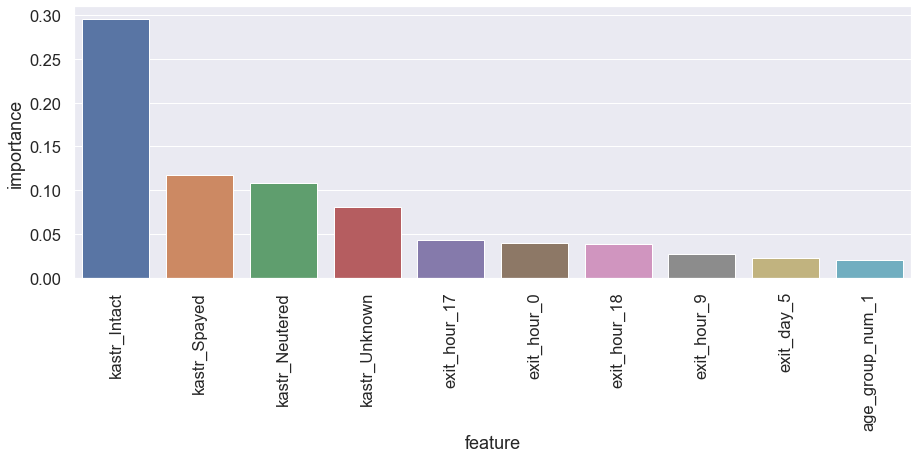

In [131]:
feature_importances = rf_classifier.feature_importances_

importances = pd.DataFrame({'importance': feature_importances, 'feature': xnames}, 
                           index=xnames).sort_values(by='importance', ascending=False)

sns.set(font_scale=1.50)
plt.figure(figsize=(15, 5))
plt.xticks(rotation=90)
sns.barplot(x='feature', y='importance', data=importances[0:10])

**Применяем метод главных компонент для ?**

In [133]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(x_train_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

**Дальше строим предсказательную модель**

In [135]:
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline, FeatureUnion

feature_union = FeatureUnion([
    ('pca', PCA()),
    ('kbest', SelectKBest())
])

prediction_model = Pipeline([
    ('feature_union', feature_union),
    ('rf', RandomForestClassifier(n_estimators=1000, criterion='gini', 
                                  class_weight='balanced_subsample', bootstrap=True, 
                                  oob_score=True))
])

In [136]:
prediction_model.fit(x_train_scaled, y_train)

Pipeline(memory=None,
         steps=[('feature_union',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('pca',
                                                 PCA(copy=True,
                                                     iterated_power='auto',
                                                     n_components=None,
                                                     random_state=None,
                                                     svd_solver='auto', tol=0.0,
                                                     whiten=False)),
                                                ('kbest',
                                                 SelectKBest(k=10,
                                                             score_func=<function f_classif at 0x00000176D3775DC8>))],
                              transformer_weights=None, verbose=False)),
                ('rf',
                 RandomForestCla...ier(bootstrap=True,
                

**Кросс-валидация**

In [138]:
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cv = StratifiedKFold(2)

In [139]:
cv_score = cross_val_score(prediction_model, x_train_scaled, y_train, cv=cv, scoring='accuracy')
cv_predict_score = cross_val_predict(prediction_model, x_train_scaled, y_train, cv=cv)

In [140]:
print(cv_score)
print(np.mean(cv_score))

print(accuracy_score(y_train, cv_predict_score))

[0.82182283 0.82049995]
0.8211613903840891
0.8211385822461454


**Точность предсказания 82%, неплохо**

In [141]:
rf_pred = prediction_model.predict(x_test_scaled)

In [142]:
print(accuracy_score(y_test, rf_pred))

0.8242109104178069


**После проверки на тестовых данных модель показала точность в районе 82%, что является неплохим результатом**